In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp

In [2]:
years = np.array([1900,1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
points = np.array([76212168, 92228496, 106021537, 123202624, 132164569,  151325798, 179323175,  203302031,  226542199])

In [3]:
def createVanderMonde(data, function):
    matrix_array = np.zeros((9,9))
    
    for i in range(9):
        for j in range(9):
            matrix_array[i][j] = pow(function(data[i]), j) 
    
    return matrix_array

In [4]:
function_01 = lambda x: x
matrix_01 = createVanderMonde(years, function_01)

function_02 = lambda x: (x - 1900)
matrix_02 = createVanderMonde(years, function_02)

function_03 = lambda x: (x - 1940)
matrix_03 = createVanderMonde(years, function_03)

function_04 = lambda x: (x - 1940)/40
matrix_04 = createVanderMonde(years, function_04)

In [5]:
cond1 = np.linalg.cond(matrix_01)
cond2 = np.linalg.cond(matrix_02)
cond3 = np.linalg.cond(matrix_03)
cond4 = np.linalg.cond(matrix_04)

In [6]:
def horner(L, x):
    i = len(L) - 1
    result = L[i]
    while i > 0:
        i = i - 1
        result = result*x + L[i]
        
    return result

In [7]:
def lagrange_interpolation(x_values, y_values, x):
    result = 0
    for j in range(len(x_values)):
        coefficient = 1
        for k in range(len(y_values)):
            if j != k:
                coefficient *= (x-x_values[k])/(x_values[j] - x_values[k])

        result += coefficient * y_values[j]

    return result

In [8]:
import matplotlib.ticker

def draw_population(years, population, new_years, new_population, title):
    plt.plot(new_years, new_population, label="Wykres populacji")
    plt.plot(years, population, ".", markersize = 10, color = "red", label="Węzeł interpolacji")
    plt.legend(loc="upper left")

    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
    plt.title(title)
    plt.xlabel("Rok")
    plt.ylabel("Populacja")
    plt.show()

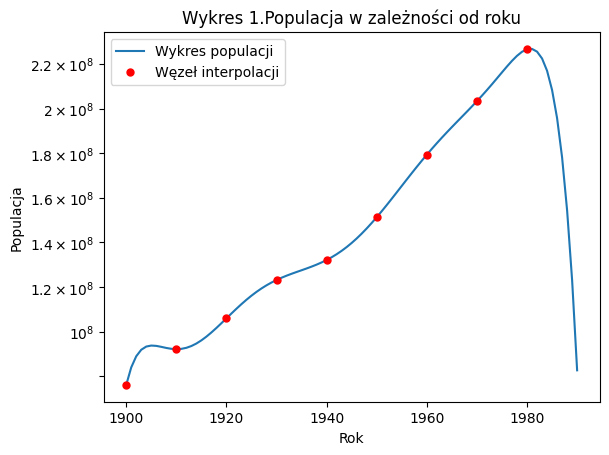

In [9]:
import matplotlib.ticker
cooeficient_vector = np.dot(np.linalg.inv(matrix_04), points)

new_years = np.arange(1900, 1991, 1)
new_points = np.zeros(len(new_years))

for i in range(len(new_years)):
    new_points[i] = horner(cooeficient_vector, function_04(new_years[i]))

plt.plot(new_years, new_points, label="Wykres populacji")
plt.plot(years, points, ".", markersize = 10, color = "red", label="Węzeł interpolacji")
plt.legend(loc="upper left")

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.title("Wykres 1.Populacja w zależności od roku")
plt.xlabel("Rok")
plt.ylabel("Populacja")
plt.show()


In [10]:
print(new_points[90])
print(np.abs(new_points[90] - 248709873))

82749141.00001292
165960731.99998707


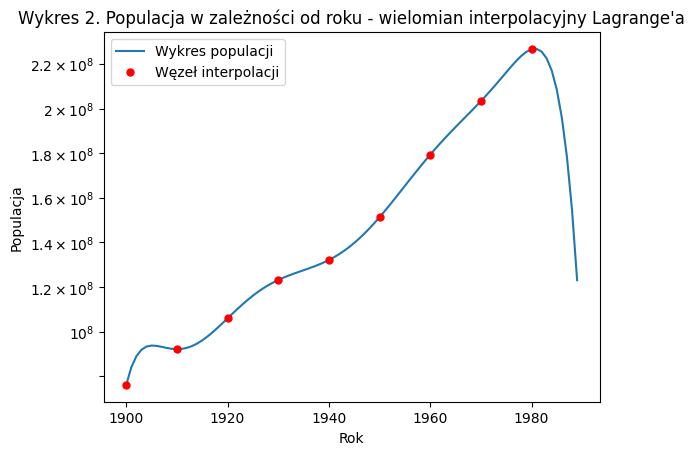

In [11]:
new_years_lagrange = np.arange(1900, 1990, 1)
new_points_lagrange = [lagrange_interpolation(years, points, 1900+i) for i in range(len(new_years_lagrange))]

plt.plot(new_years_lagrange, new_points_lagrange, label="Wykres populacji")
plt.plot(years, points, ".", markersize = 10, color = "red", label="Węzeł interpolacji")
plt.legend(loc="upper left")

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.title("Wykres 2. Populacja w zależności od roku - wielomian interpolacyjny Lagrange'a")
plt.xlabel("Rok")
plt.ylabel("Populacja")
plt.show()

In [12]:
def newton_interpolation(points, years):
    newton_basis = np.zeros((len(points), len(points)))
    
    for i in range(len(newton_basis)):
        newton_basis[i][0] = 1
        
    for i in range(1, len(newton_basis)):
        for j in range(1, i+1):
            actual = years[i] - years[j-1]
            newton_basis[i][j] = actual * newton_basis[i][j-1]
            
    return newton_basis

In [13]:
new_x_values = np.arange(1900, 1991, 1, dtype="int64")
new_y_values = np.zeros(len(new_x_values), dtype="int64")

In [14]:
newton_basis = np.zeros((len(points), len(points)))
for i in range(len(newton_basis)):
        newton_basis[i][0] = 1
        
for i in range(1, len(newton_basis)):
    for j in range(1, i+1):
        coeff = years[i] - years[j-1]
        newton_basis[i][j] = coeff * newton_basis[i][j-1]

coefficient_newton = np.dot(np.linalg.inv(newton_basis), points)

for n in range(len(new_y_values)):
    acutal = 1
    result = coefficient_newton[0]
    for j in range(1, len(points)):
        acutal *= (new_x_values[n] - years[j-1])
        result += coefficient_newton[j] * acutal
    new_y_values[n] = result

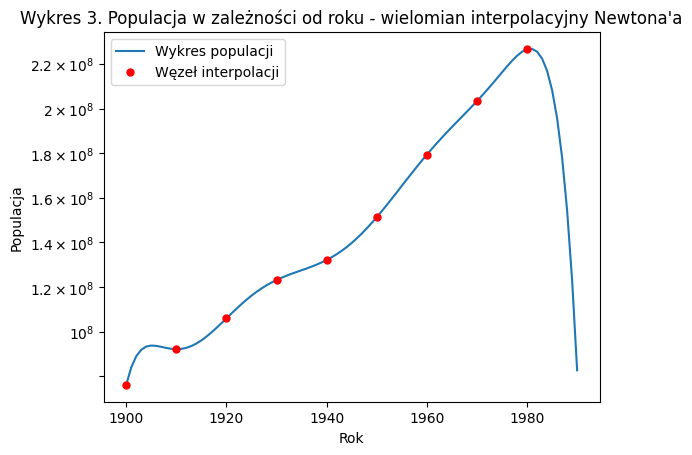

In [15]:
plt.plot(new_x_values, new_y_values, label="Wykres populacji")
plt.plot(years, points, ".", markersize = 10, color = "red", label="Węzeł interpolacji")
plt.legend(loc="upper left")

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.title("Wykres 3. Populacja w zależności od roku - wielomian interpolacyjny Newtona'a")
plt.xlabel("Rok")
plt.ylabel("Populacja")
plt.show()

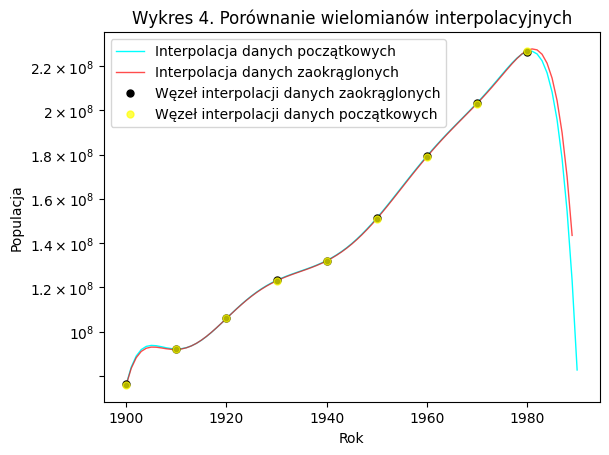

In [16]:
points_rounded = [np.round(i/10.**6)*10**6 for i in points]
cooeficient_vector_2 = np.dot(np.linalg.inv(matrix_04), points_rounded)

new_years_2 = np.arange(1900, 1990, 1)
new_points_2 = np.zeros(len(new_years_2))

for i in range(len(new_years_2)):
    new_points_2[i] = horner(cooeficient_vector_2, function_04(new_years_2[i]))
    
plt.plot(new_years, new_points, linewidth=1,  color="cyan", label="Interpolacja danych początkowych")
plt.plot(new_years_2, new_points_2, linewidth=1, color="red", alpha=0.7, label="Interpolacja danych zaokrąglonych")
plt.plot(years, points, ".", markersize = 10, color = "black", label="Węzeł interpolacji danych zaokrąglonych")
plt.plot(years, points_rounded, ".", markersize = 10, color = "yellow", alpha=0.7, label="Węzeł interpolacji danych początkowych")
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
plt.title("Wykres 4. Porównanie wielomianów interpolacyjnych")
plt.xlabel("Rok")
plt.ylabel("Populacja")
plt.legend(loc="upper left")

plt.show()
